# <span style="color:red"> Lezione 01 </span>
## <span style="color:green"> Esercizio 01.1 </span>

Ho testato il generatore di numeri casuali campionando $10^5$ volte una distribuzione di probabilità uniforme e dividendo i lanci in 100 blocchi per facilitarne il calcolo ed evitare di salvare separatamente il risultato di questi lanci. Per prima cosa ho ottenuto la media del valore di questi lanci, con relativo errore statistico.
Ho ripetuto poi lo stesso procedimento (ripetendo i lanci) in modo da ottenerne la deviazione standard con relativa incertezza statistica.

Inoltre, ho generando nuovamente 100 blocchi e ho calcolato singolarmente il $\mathrm{\chi^2}$ di ogni blocco, evitando sempre di salvare i risultati dei singoli lanci una volta ottenuto il $\mathrm{\chi^2}$ del blocco.
    

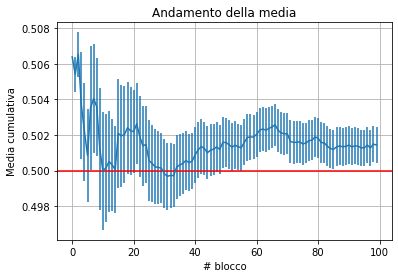

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

Names = np.array(["mean_raw","errors_raw","dev_mean_raw","err_dev_raw","chi_sq_raw"])
datas = Table.read("Data.txt",format="ascii",names=Names)

mean = np.array(datas["mean_raw"])
errors = np.array(datas["errors_raw"])
dev_mean = np.array(datas["dev_mean_raw"])
dev_err = np.array(datas["err_dev_raw"])
chi_squared = np.array(datas["chi_sq_raw"])
N = len(mean)
x = np.arange(N)

    
plt.errorbar(x,mean,yerr=errors)
plt.axhline(0.5,color="r")
plt.title("Andamento della media")
plt.xlabel("# blocco")
plt.ylabel("Media cumulativa")
plt.grid(True)
plt.show()

Si nota che il risultato finale è compatibile con il valore atteso di 0.5 all'interno di $\mathrm{1.4 \ \sigma}$. Possiamo quindi dire di avere ottenuto un valore compatibile con il valore atteso.
Si nota anche che, coerentemente con le attese, l'errore si riduce aumentando il numero di blocchi. 

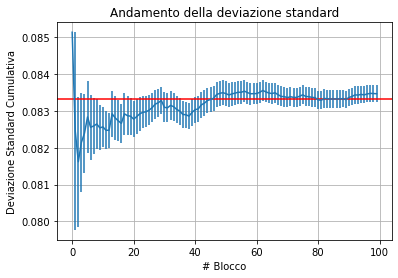

In [30]:
plt.errorbar(x,dev_mean,yerr=dev_err)
plt.axhline(1/12,color="r")
plt.grid(True)
plt.title("Andamento della deviazione standard")
plt.xlabel("# Blocco")
plt.ylabel("Deviazione Standard Cumulativa")
plt.show()

Abbiamo un valore compatibile all'interno di un $\mathrm{\sigma}$ con il valore atteso di $\frac{1}{12}$. Abbiamo nuovamente un risultato compatibile con quello atteso.

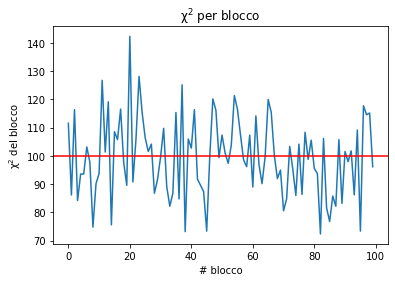

In [34]:
plt.plot(x,chi_squared)
plt.axhline(100,color="r")
plt.title ("$\mathrm{\chi^2}$ per blocco")
plt.xlabel("# blocco")
plt.ylabel("$\mathrm{\chi^2}$ del blocco")
plt.show()

Si ottengono, come atteso, oscillazioni attorno al valore teorico di 100. Queste oscillazioni comunque rimangono all'interno di un intervallo di confidenza del 95%, quindi consideriamo l'ipotesi di distribuzione uniforme ideale come accettabile.

## <span style="color:green"> Esercizio 01.2 </span>

Ho sommato il risutato di 100 campionamenti di una distibuzione uniforme, poi ho ripetuto questo procedimento 10000 volte mettendo in un istogramma i risultati ottenuti. Ho poi ripetuto lo stesso procedimento per una distribuzione esponenziale con $\mu$=1 e una lorentziana con $\mu$=0 e $\gamma$=1. 

Poi ho provato a fare un fit del risultato dei primi due integrali con una gaussiana e del terzo con una lorentziana.

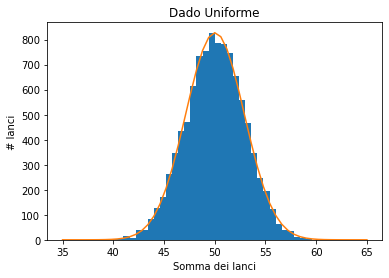

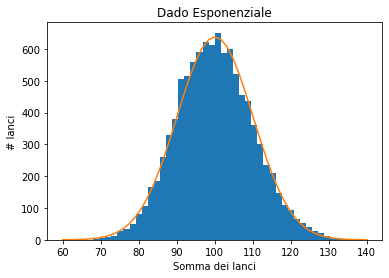

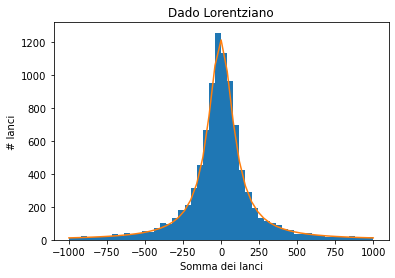

In [87]:
from scipy.stats import cauchy
import scipy

Hist_names=["Flat","Expo","Lor"]
Hist_datas = Table.read("Histograms.txt",format="ascii",names=Hist_names)

Flats = np.array(Hist_datas["Flat"])
Expos = np.array(Hist_datas["Expo"])
Lors = np.array(Hist_datas["Lor"])

N,bins,_ = plt.hist(Flats,bins=50,range=[35.,65.])

plt.title("Dado Uniforme")
plt.xlabel("Somma dei lanci")
plt.ylabel("# lanci")
mu, sigma = scipy.stats.norm.fit(Flats)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma) #fit con scipy
constant=(bins[1]-bins[0])*sum(N) #area sottesa dall'istogramma
plt.plot(bins, best_fit_line*constant) #rinormalizzo la gaussiana fittata moltiplicando per l'area sottesa dall'istogramma
plt.show()

N,bins,_=plt.hist(Expos,range=[60.,140.],bins=50)
plt.title("Dado Esponenziale")
plt.xlabel("Somma dei lanci")
plt.ylabel("# lanci")
mu, sigma = scipy.stats.norm.fit(Expos)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
constant=(bins[1]-bins[0])*sum(N)
plt.plot(bins, best_fit_line*constant)
plt.show()


N,bins,_=plt.hist(Lors,range=[-1000.,1000.],bins=50) 
plt.title("Dado Lorentziano")
plt.xlabel("Somma dei lanci")
plt.ylabel("# lanci")
mu, sigma = scipy.stats.cauchy.fit(Lors) #fit lorentziano con scipy 
best_fit_line = scipy.stats.cauchy.pdf(bins, mu, sigma)
constant=(bins[1]-bins[0])*sum(N)
plt.plot(bins, best_fit_line*constant)
plt.show()


Notiamo che il fit è molto buono sia nei due casi gaussiani sia nel caso lorentziano. Anche i valori di aspettazione teorici, uguali a $\mu \cdot N$, sono compatibili con quelli ottenuti dalla simulazione.

Abbiamo infatti un valore di aspettazione di 50 nel caso uniforme ($\mu=\frac{1}{2}$ e N=100), di 100 nel caso esponenziale ($\mu$=1) e di 0 nel caso lorentziano ($\mu$=0).

## <span style="color:green"> Esercizio 01.3 </span>

Ho implementato l'algoritmo di Buffon per il calcolo di $\pi$.

Per questa implementazione, ho calcolato solo le ordinate dei due estremi, chiamate $A_{ago}$ e $B_{ago}$, non essendo necessaria l'ascissa per stabilire se l'ago intersechi o meno una delle righe orizzontali.
Perciò, ho simulato il lancio degli aghi campionando un numero casuale tra 0 ed 1 e, preso quel valore come la posizione di un estremo dell'ago, ho ottenuto il secondo estremo tramite la formula 
$$ A_{ago} = B_{ago} + l * \cos(\theta) $$,
dove $l$ è la lunghezza data all'ago, presa uguale a 0.2. La distanza tra le righe è stata presa uguale a 0.25. Questi valori sono stati scelti in modo empirico in modo da far convergere più rapidamente l'algoritmo. 

Poichè $0 \leq \theta < 2\pi$, è stato necessario campionare $\cos(\theta)$ invece di campionare $\theta$ singolarmente tramite una distribuzione uniforme. In questo modo non ho mai usato $\pi$ durante l'esecuzione del'algoritmo. Utilizzando il metodo accept-reject ho campionato la funzione $y=\frac{1}{\sqrt{1-x^2}}$, la cui cumulativa è proprio $y=cos(x)$, quindi, sostituendo il risultato dell'accept-reject a $\cos(\theta)$ si può simulare correttamente il lacio di un ago. \
Poichè la funzione $y=\frac{1}{\sqrt{1-x^2}}$ diverge in $x= \pm 1$ è stato necessario introdurre all'interno del metodo accept-reject un cutoff sulle y (scelto uguale a 400 come buon compromesso tra precisione e velocità dell'algoritmo) che poi è stato riportato sulle x invertendo la funzione. Questo divergere della funzione rallenta molto l'algoritmo a causa del grande numero di valori rigettati, tuttavia, poichè è stato possibile ottenere una notevole precisione con un tempo di esecuzione di circa 15 secondi, non ho ritenuto opportuno operare ulteriori modifiche.

In totale ho compiuto $10^6$ lanci, divisi in 100 blocchi da $10^4$ lanci ciascuno.

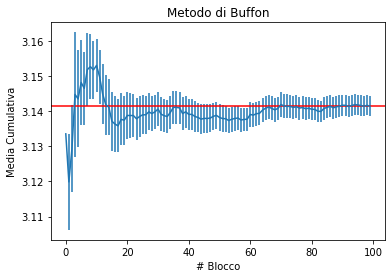

In [94]:
Buff_names = ["val","errors"]
Buff_datas = Table.read("Buffon_results.txt",format="ascii",names=Buff_names)

pi_est = np.array(Buff_datas["val"])
pi_errs = np.array (Buff_datas["errors"])
n_blocks = len(pi_est)
Buff_xs = np.arange(n_blocks)

plt.errorbar(Buff_xs,pi_est,yerr=pi_errs)
plt.title("Metodo di Buffon")
plt.xlabel("# Blocco")
plt.ylabel("Media Cumulativa")
plt.axhline(np.pi,color="r")
plt.show()

Come possiamo vedere dal grafico qui sopra, il valore di $\pi$ ottenuto tramite il lancio di $10^6$ aghi secondo l'algoritmo di Buffon è in ottimo accordo con il valore teorico.